In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
file_path = "/content/drive/MyDrive/취업 프로젝트/주택 가격 예측 프로그램/서울시 부동산 실거래가 정보.csv"
if os.path.exists(file_path):
  print("File exists")
else:
  print("File not found")

File exists


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 0 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (6,881 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 119627 files and direc

In [ ]:
df = pd.read_csv(file_path, encoding='cp949')
df.head()

<ipython-input-5-e59d2a7b7cc9>:1: DtypeWarning: Columns (15,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='cp949')


,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
0,2024,11620,관악구,10100,봉천동,1.0,대지,180.0,557.0,가든빌라가,...,22200,49.14,35.00,1.0,NaN,NaN,1988.0,연립다세대,중개거래,서울 관악구
1,2024,11620,관악구,10200,신림동,1.0,대지,1465.0,1.0,신사타운빌,...,40500,39.26,24.00,2.0,NaN,NaN,2016.0,연립다세대,중개거래,서울 관악구
2,2024,11620,관악구,10100,봉천동,1.0,대지,876.0,1.0,그린피아 오피스텔,...,10000,25.84,33.56,3.0,NaN,NaN,2002.0,오피스텔,직거래,NaN
3,2024,11620,관악구,10100,봉천동,1.0,대지,1718.0,0.0,벽산블루밍,...,73700,59.99,0.00,11.0,NaN,NaN,2005.0,아파트,중개거래,서울 관악구
4,2024,11620,관악구,10200,신림동,1.0,대지,611.0,3.0,우석빌라14차,...,16700,27.22,11.00,4.0,NaN,NaN,1995.0,연립다세대,중개거래,서울 금천구


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103987 entries, 0 to 103986
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   접수연도              103987 non-null  int64  
 1   자치구코드             103987 non-null  int64  
 2   자치구명              103987 non-null  object 
 3   법정동코드             103987 non-null  int64  
 4   법정동명              103987 non-null  object 
 5   지번구분              91969 non-null   float64
 6   지번구분명             91969 non-null   object 
 7   본번                91972 non-null   float64
 8   부번                91972 non-null   float64
 9   건물명               91972 non-null   object 
 10  계약일               103987 non-null  int64  
 11  물건금액(만원)          103987 non-null  int64  
 12  건물면적(㎡)           103987 non-null  float64
 13  토지면적(㎡)           73201 non-null   float64
 14  층                 91969 non-null   float64
 15  권리구분              371 non-null     object 
 16  취소일               10

In [ ]:
df.describe()

,접수연도,자치구코드,법정동코드,지번구분,본번,부번,계약일,물건금액(만원),건물면적(㎡),토지면적(㎡),층,취소일,건축년도
count,103987.000000,103987.0,103987.000000,91969.000000,91972.000000,91972.000000,1.039870e+05,1.039870e+05,103987.000000,73201.000000,91969.000000,1.094000e+03,103723.000000
mean,2014.278535,11620.0,10154.387568,1.002338,1105.763972,57.470785,2.014298e+07,3.507090e+04,76.624007,44.137178,6.034327,2.021682e+07,1992.005987
std,5.289874,0.0,58.343588,0.049186,599.878434,116.701174,5.287049e+04,3.070048e+04,70.548239,52.649216,5.607622,1.338044e+04,119.787983
min,2006.000000,11620.0,10100.000000,1.000000,1.000000,0.000000,2.006010e+07,1.300000e+03,4.580000,0.000000,-2.000000,2.020030e+07,0.000000
25%,2009.000000,11620.0,10100.000000,1.000000,602.000000,0.000000,2.009091e+07,1.670000e+04,42.210000,18.900000,2.000000,2.020113e+07,1993.000000
50%,2015.000000,11620.0,10100.000000,1.000000,1135.000000,6.000000,2.015052e+07,2.800000e+04,59.900000,27.670000,4.000000,2.021111e+07,2000.000000
75%,2018.000000,11620.0,10200.000000,1.000000,1706.000000,49.000000,2.018101e+07,4.330000e+04,84.840000,41.370000,9.000000,2.023032e+07,2005.000000
max,2024.000000,11620.0,10700.000000,3.000000,1746.000000,1604.000000,2.024102e+07,1.080000e+06,2177.260000,3429.000000,36.000000,2.024101e+07,2024.000000


# **데이터 전처리**

In [ ]:
df.isna().sum()

,0
접수연도,0
자치구코드,0
자치구명,0
법정동코드,0
법정동명,0
지번구분,12018
지번구분명,12018
본번,12015
부번,12015
건물명,12015


In [ ]:
# Step 1: 불필요한 열 삭제

columns_to_drop = ['접수연도','자치구코드', '자치구명', '지번구분', '본번', '부번', '취소일', '권리구분', '신고한 개업공인중개사 시군구명']
df = df.drop(columns=columns_to_drop)

In [ ]:
# Step 2: '건축년도' 결측치 삭제
df = df.dropna(subset=['건축년도'])

In [ ]:
df['지번구분명'].unique()

array(['대지', nan, '산', '블럭'], dtype=object)

In [ ]:
# step 3: '층'은 결측치가 있는 경우 0으로 대체
df['층'] = df['층'].fillna(0)


In [ ]:
df['층'].isna().sum()

0

In [ ]:
# Step 4: '토지면적(㎡)' 결측치 처리 - 건물면적과 비슷한 값들의 평균 토지면적으로 대체

# 1. '토지면적(㎡)' 결측치가 없는 데이터만 사용하여 '건물면적(㎡)' 구간 나누기
data_with_land = df.dropna(subset=['토지면적(㎡)']).copy()
data_without_land = df[df['토지면적(㎡)'].isnull()].copy()

# 2. '건물면적(㎡)'을 기준으로 구간 나누기 (토지면적 결측치 없는 데이터로)
data_with_land['면적_구간'] = pd.cut(data_with_land['건물면적(㎡)'], bins=10)

# 3. 각 구간별 평균 '토지면적(㎡)' 계산
average_land_area_by_area = data_with_land.groupby('면적_구간')['토지면적(㎡)'].mean()

# 4. '토지면적(㎡)' 결측치가 있는 데이터에 동일한 구간 적용
data_without_land['면적_구간'] = pd.cut(data_without_land['건물면적(㎡)'], bins=data_with_land['면적_구간'].cat.categories)

# 5. 결측치인 '토지면적(㎡)' 값을 해당 구간의 평균으로 대체
def fill_land_area(row):
    if pd.isnull(row['토지면적(㎡)']):
        return average_land_area_by_area.get(row['면적_구간'], average_land_area_by_area.mean())
    else:
        return row['토지면적(㎡)']

data_without_land['토지면적(㎡)'] = data_without_land.apply(fill_land_area, axis=1)

# 6. 데이터프레임 합치기
df = pd.concat([data_with_land, data_without_land], ignore_index=True)

# '면적_구간'은 분석에 필요하지 않으므로 제거
df = df.drop(columns=['면적_구간'])

<ipython-input-15-90735540dc9d>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_land_area_by_area = data_with_land.groupby('면적_구간')['토지면적(㎡)'].mean()


In [ ]:
# 추가로 불필요한 열 삭제
df = df.drop(columns='신고구분')

In [ ]:
# Step 5: '계약일'을 문자열로 변환 (향후 날짜 처리 가능하도록 준비)
df['계약일'] = df['계약일'].astype(str)

In [ ]:
df.isna().sum()

,0
법정동코드,0
법정동명,0
지번구분명,0
건물명,0
계약일,0
물건금액(만원),0
건물면적(㎡),0
토지면적(㎡),0
층,0
건축년도,0


In [ ]:
# Step 6: '지번구분명' 결측치 삭제
df = df.dropna(subset=['지번구분명'])

In [ ]:
# Step 7: 데이터 타입 확인 및 출력 (변환 후 데이터 상태 확인)
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 91935 entries, 0 to 103722
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   법정동코드     91935 non-null  int64  
 1   법정동명      91935 non-null  object 
 2   지번구분명     91935 non-null  object 
 3   건물명       91935 non-null  object 
 4   계약일       91935 non-null  object 
 5   물건금액(만원)  91935 non-null  int64  
 6   건물면적(㎡)   91935 non-null  float64
 7   토지면적(㎡)   91935 non-null  float64
 8   층         91935 non-null  float64
 9   건축년도      91935 non-null  float64
 10  건물용도      91935 non-null  object 
dtypes: float64(4), int64(2), object(5)
memory usage: 8.4+ MB
None
   법정동코드 법정동명 지번구분명        건물명       계약일  물건금액(만원)  건물면적(㎡)  토지면적(㎡)     층  \
0  10100  봉천동    대지      가든빌라가  20241015     22200    49.14    35.00   1.0   
1  10200  신림동    대지      신사타운빌  20241015     40500    39.26    24.00   2.0   
2  10100  봉천동    대지  그린피아 오피스텔  20241014     10000    25.84    33.56   3.0   
3  10100 

In [ ]:
df.describe()

,법정동코드,물건금액(만원),건물면적(㎡),토지면적(㎡),층,건축년도
count,91935.000000,91935.000000,91935.000000,91935.000000,91935.000000,91935.000000
mean,10153.255017,29701.539425,58.936308,27.942847,6.034753,1992.716397
std,58.983514,19138.808679,25.877934,14.967995,5.608503,127.161088
min,10100.000000,1300.000000,9.260000,0.000000,-2.000000,0.000000
25%,10100.000000,15600.000000,40.125000,21.590000,2.000000,1994.000000
50%,10100.000000,25600.000000,59.580000,32.990000,4.000000,2002.000000
75%,10200.000000,38900.000000,80.230000,34.884297,9.000000,2005.000000
max,10700.000000,165000.000000,194.660000,221.160000,36.000000,2024.000000


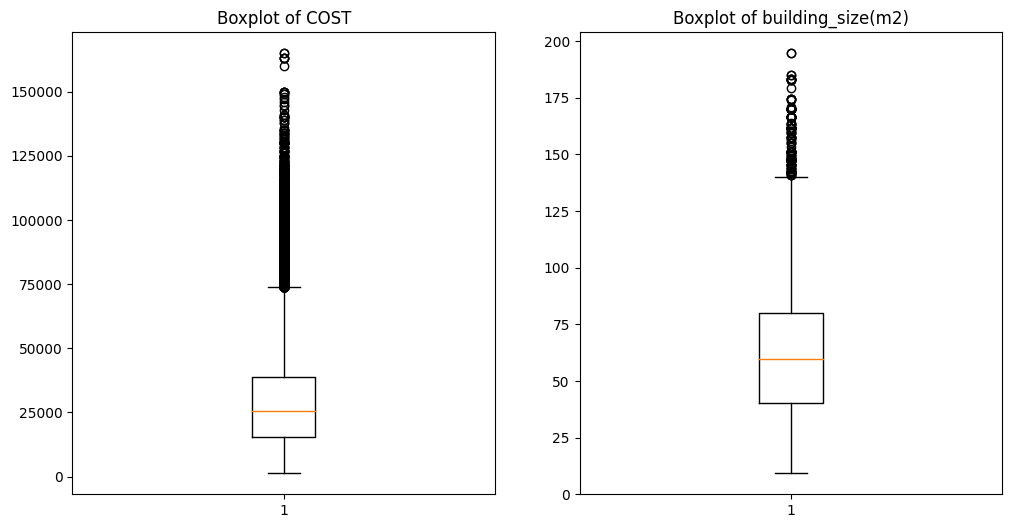

In [ ]:
# Step 8: 이상치 시각화 (박스플롯 그리기)
# 물건금액(만원)과 건물면적(㎡)에 대한 박스플롯을 그려 이상치 시각적으로 확인
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.boxplot(df['물건금액(만원)'].dropna())
plt.title('Boxplot of COST')

plt.subplot(1, 2, 2)
plt.boxplot(df['건물면적(㎡)'].dropna())
plt.title('Boxplot of building_size(m2)')

plt.show()

In [ ]:
# 이상치 제거전
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91935 entries, 0 to 103722
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   법정동코드     91935 non-null  int64  
 1   법정동명      91935 non-null  object 
 2   지번구분명     91935 non-null  object 
 3   건물명       91935 non-null  object 
 4   계약일       91935 non-null  object 
 5   물건금액(만원)  91935 non-null  int64  
 6   건물면적(㎡)   91935 non-null  float64
 7   토지면적(㎡)   91935 non-null  float64
 8   층         91935 non-null  float64
 9   건축년도      91935 non-null  float64
 10  건물용도      91935 non-null  object 
dtypes: float64(4), int64(2), object(5)
memory usage: 8.4+ MB


In [ ]:
# Step 8: 이상치 제거 (IQR 방식을 이용한 이상치 제거)
# 물건금액(만원)
q1_price = df['물건금액(만원)'].quantile(0.25)
q3_price = df['물건금액(만원)'].quantile(0.75)
iqr_price = q3_price - q1_price
lower_bound_price = q1_price - 1.5 * iqr_price
upper_bound_price = q3_price + 1.5 * iqr_price

# 건물면적(㎡)
q1_area = df['건물면적(㎡)'].quantile(0.25)
q3_area = df['건물면적(㎡)'].quantile(0.75)
iqr_area = q3_area - q1_area
lower_bound_area = q1_area - 1.5 * iqr_area
upper_bound_area = q3_area + 1.5 * iqr_area


In [ ]:
# 이상치 제거
df = df[(df['물건금액(만원)'] >= lower_bound_price) & (df['물건금액(만원)'] <= upper_bound_price)]
df = df[(df['건물면적(㎡)'] >= lower_bound_area) & (df['건물면적(㎡)'] <= upper_bound_area)]


In [ ]:
# 이상치 제거 후
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88387 entries, 0 to 103722
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   법정동코드     88387 non-null  int64  
 1   법정동명      88387 non-null  object 
 2   지번구분명     88387 non-null  object 
 3   건물명       88387 non-null  object 
 4   계약일       88387 non-null  object 
 5   물건금액(만원)  88387 non-null  int64  
 6   건물면적(㎡)   88387 non-null  float64
 7   토지면적(㎡)   88387 non-null  float64
 8   층         88387 non-null  float64
 9   건축년도      88387 non-null  float64
 10  건물용도      88387 non-null  object 
dtypes: float64(4), int64(2), object(5)
memory usage: 8.1+ MB


In [ ]:
# step 9 계약일을 문자열에서 날짜 형식으로 변환
df['계약일'] = pd.to_datetime(df['계약일'], format='%Y%m%d')  # 'YYYYMMDD' 형식일 경우

# 연도, 월, 일, 분기, 요일로 분리
df['연도'] = df['계약일'].dt.year
df['월'] = df['계약일'].dt.month
df['일'] = df['계약일'].dt.day
df['분기'] = df['계약일'].dt.quarter
df['요일'] = df['계약일'].dt.dayofweek  # 0: 월요일, 6: 일요일

# 데이터 확인
print(df[['계약일', '연도', '월', '일', '분기', '요일']].head())

         계약일    연도   월   일  분기  요일
0 2024-10-15  2024  10  15   4   1
1 2024-10-15  2024  10  15   4   1
2 2024-10-14  2024  10  14   4   0
3 2024-10-14  2024  10  14   4   0
4 2024-10-12  2024  10  12   4   5


In [ ]:
df.head()

,법정동코드,법정동명,지번구분명,건물명,계약일,물건금액(만원),건물면적(㎡),토지면적(㎡),층,건축년도,건물용도,연도,월,일,분기,요일
0,10100,봉천동,대지,가든빌라가,2024-10-15,22200,49.14,35.00,1.0,1988.0,연립다세대,2024,10,15,4,1
1,10200,신림동,대지,신사타운빌,2024-10-15,40500,39.26,24.00,2.0,2016.0,연립다세대,2024,10,15,4,1
2,10100,봉천동,대지,그린피아 오피스텔,2024-10-14,10000,25.84,33.56,3.0,2002.0,오피스텔,2024,10,14,4,0
3,10100,봉천동,대지,벽산블루밍,2024-10-14,73700,59.99,0.00,11.0,2005.0,아파트,2024,10,14,4,0
4,10200,신림동,대지,우석빌라14차,2024-10-12,16700,27.22,11.00,4.0,1995.0,연립다세대,2024,10,12,4,5


In [ ]:
df.describe()

,법정동코드,계약일,물건금액(만원),건물면적(㎡),토지면적(㎡),층,건축년도,연도,월,일,분기,요일
count,88387.000000,88387,88387.000000,88387.000000,88387.000000,88387.000000,88387.000000,88387.000000,88387.000000,88387.000000,88387.000000,88387.000000
mean,10154.272687,2014-07-11 06:52:03.418601984,27372.561712,57.664688,28.555754,5.853395,1995.178872,2014.043208,6.310215,15.771810,2.432122,2.683834
min,10100.000000,2006-01-01 00:00:00,1300.000000,9.260000,0.000000,-2.000000,0.000000,2006.000000,1.000000,1.000000,1.000000,0.000000
25%,10100.000000,2009-08-15 00:00:00,15200.000000,39.240000,22.400000,2.000000,1994.000000,2009.000000,3.000000,8.000000,1.000000,1.000000
50%,10100.000000,2015-03-19 00:00:00,25000.000000,59.390000,33.370000,4.000000,2002.000000,2015.000000,6.000000,16.000000,2.000000,3.000000
75%,10200.000000,2018-06-28 12:00:00,36890.000000,75.815000,34.884297,8.000000,2005.000000,2018.000000,9.000000,23.000000,3.000000,4.000000
max,10700.000000,2024-10-15 00:00:00,73800.000000,140.100000,173.050000,29.000000,2024.000000,2024.000000,12.000000,31.000000,4.000000,6.000000
std,58.842761,NaN,15183.596982,25.041830,14.347620,5.489441,105.362335,5.206163,3.331104,8.740354,1.100650,1.896604


# 평당 가격 열 추가하기

In [ ]:
# Step 1: 건물면적(㎡) 또는 토지면적(㎡)이 0인 데이터를 제거
df = df[(df['건물면적(㎡)'] > 0) & (df['토지면적(㎡)'] > 0)]

# Step 2: 건물 면적을 평으로 변환 (1평 = 3.3㎡)
df['건물면적(평)'] = df['건물면적(㎡)'] / 3.3

# Step 3: 평당 가격(만원)을 계산 (물건금액 / 건물면적(평))
df['평당 가격(만원)'] = df['물건금액(만원)'] / df['건물면적(평)']

# Step 4: 계산 결과 확인
print(df[['건물면적(㎡)', '건물면적(평)', '토지면적(㎡)', '물건금액(만원)', '평당 가격(만원)']].head())


   건물면적(㎡)    건물면적(평)  토지면적(㎡)  물건금액(만원)    평당 가격(만원)
0    49.14  14.890909    35.00     22200  1490.842491
1    39.26  11.896970    24.00     40500  3404.228222
2    25.84   7.830303    33.56     10000  1277.089783
4    27.22   8.248485    11.00     16700  2024.614254
5    36.93  11.190909    47.01     24200  2162.469537


<ipython-input-31-e83149658a5d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['건물면적(평)'] = df['건물면적(㎡)'] / 3.3
<ipython-input-31-e83149658a5d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['평당 가격(만원)'] = df['물건금액(만원)'] / df['건물면적(평)']


In [ ]:
# Step 10: 저장 (전처리 완료된 데이터 저장)
save_path = '/content/drive/MyDrive/취업 프로젝트/주택 가격 예측 프로그램/관악구_부동산_데이터(10.25).csv'
df.to_csv(save_path, index=False, encoding='utf-8-sig')